In [1]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# specify the path to the Chrome driver and set some options
driver_path = 'path/to/chromedriver'
options = webdriver.ChromeOptions()
options.add_argument('--incognito')  # launch Chrome in incognito mode

# create a new Chrome instance and navigate to the Fiverr search page
driver = webdriver.Chrome(executable_path=driver_path, options=options)

#searching terms of interest
modelling_url = 'https://www.fiverr.com/search/gigs?query=3d%20printing%20modelling&source=top-bar&ref_ctx_id=6878f5063106a5932b1547c81bea74c2&search_in=everywhere&search-autocomplete-original-term=3d%20printing%20modelling'
printing_url = 'https://www.fiverr.com/search/gigs?query=3d%20printing&source=top-bar&ref_ctx_id=4856501c8295b06c632d2fd0c303bf9e&search_in=everywhere&search-autocomplete-original-term=3d%20printing'
painting_url = 'https://www.fiverr.com/search/gigs?query=3d%20painting&source=top-bar&ref_ctx_id=6a09c08d04e3bd9881682f07c12e8072&search_in=everywhere&search-autocomplete-original-term=3d%20painting'

url = painting_url 


driver.get(url)

# wait for the search results to load
wait = WebDriverWait(driver, 10)
wait.until(EC.presence_of_element_located((By.CLASS_NAME, 'gig-wrapper')))


# extract the search results using BeautifulSoup
soup = BeautifulSoup(driver.page_source, 'html.parser')
gigs = soup.find_all('div', {'class': 'gig-wrapper'})

In [4]:
gig_dict = {}
ids = []
title = []
currency = []
cost = []

for gig in gigs:
    ids.append(gig['data-gig-id'])
    title.append(gig.find_all('a')[2]['title'])
    currency.append(str(gig.find_all('a')[3].span).split('span')[1][1])
    cost.append(str(gig.find_all('a')[3].span).split('span')[1][2:-2])

gig_dict['gig_id'] = ids
gig_dict['title'] = title
gig_dict['currency'] = currency
gig_dict['cost'] = cost


In [5]:

if url == modelling_url:
    modelling_df = pd.DataFrame(gig_dict)
    modelling_df.to_csv('modelling_data.csv', index = False)
    modelling_df['search_key'] = 'modelling'

elif url == printing_url:
    printing_df = pd.DataFrame(gig_dict)
    printing_df.to_csv('printing_data.csv',  index = False)
    printing_df['search_key'] = 'printing'

elif url == painting_url:
    painting_df = pd.DataFrame(gig_dict)
    painting_df .to_csv('painting_data.csv',  index = False)
    painting_df ['search_key'] = 'painting'

In [56]:
#cleaning data
printing_df['search_key'] = printing_df['search_key'].str.replace('painting', 'printing')
painting_df['cost'] = painting_df['cost'].str.replace('ata-uw-rm-sr="">£', '')
painting_df['currency'] = painting_df['currency'].str.replace('d', '£')

df = pd.concat([modelling_df, printing_df, painting_df])
df['cost'] = df['cost'].astype(int)
df.to_csv('fiver_3d_modelling_printing_painting_costs.csv')

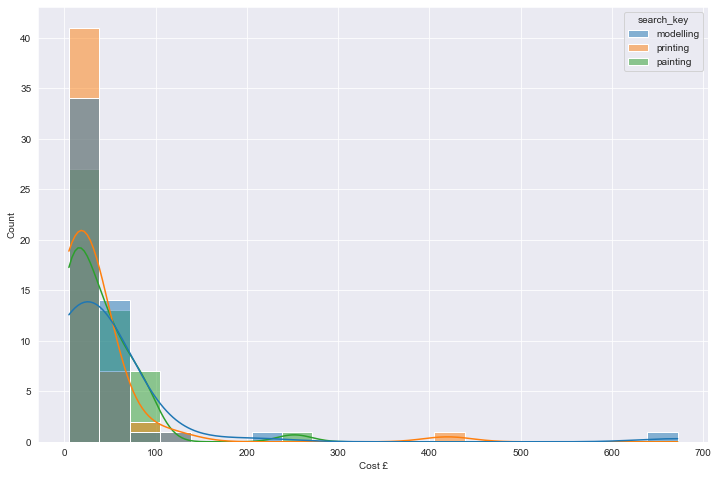

<Figure size 432x288 with 0 Axes>

In [68]:
#price distribution
fig, ax = plt.subplots(figsize = (12, 8))
sns.set_style('darkgrid')
sns.histplot(data = df, x = 'cost', kde = True, hue = 'search_key', bins = 20)
plt.xlabel('Cost £')
plt.show()
plt.savefig('price_distribution.png')

In [60]:
df.groupby('search_key')['cost'].mean()

search_key
modelling    44.807692
painting     37.791667
printing     32.673077
Name: cost, dtype: float64